In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls /home/jupyter/save/attn_weights/

batch_data.npz		     test_attn-visual_bert_coco_ft.npy
test_attn-unimodal_bert.npy  test_attn-visual_bert_direct_ft.npy


In [3]:
attn_dir = "/home/jupyter/save/attn_weights/"

In [9]:
batch = np.load('%s/batch_data.npz' % attn_dir)
batch.allow_pickle = True

In [11]:
batch['text'][0].__len__()

10

[[1 1]
 [0 0]]


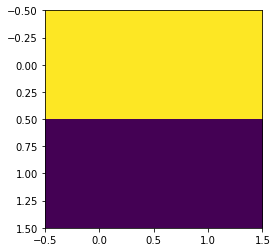

In [15]:
a = np.array([[1, 1], [0, 0]])
print(a)
plt.imshow(a)

### Visual Bert COCO 

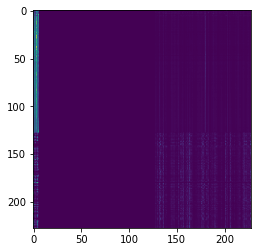

In [9]:
plt.imshow(attn[5
            ,0, 0])

In [4]:
attn = np.load('%s/test_attn-visual_bert_coco_ft.npy' % attn_dir)
attn.shape

(16, 12, 12, 228, 228)

In [5]:
def plot_text_matr(sample, layer, head):
    data = attn[sample, layer, head]
    seq_len = len(batch['text'][sample])
    data = data[:seq_len, :seq_len]
    plt.imshow(data)

In [20]:
len(batch['text'][0])

10

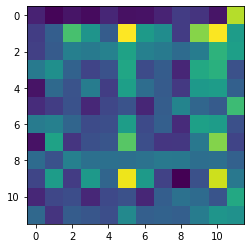

In [30]:
matr = plot_text_matr(3, 0,0)


In [35]:
def plot_img_matr(sample, layer, head):
    data = attn[sample, layer, head, 128:, 128:]
    return data

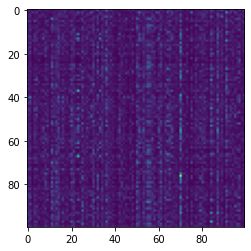

In [75]:
plt.imshow(plot_img_matr(0, 0, 0))

(0.0, 3.0)

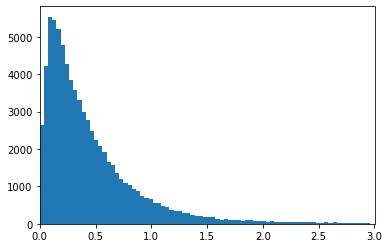

In [118]:
# visualize distribution of unnormalized attn per patch
layer = 2
_ = plt.hist(attn[:,layer,:,128:,128:].transpose(0, 1, 3, 2).reshape(64 * 12 * 100, 100).sum(axis=1), bins=np.arange(0, 3, 3 / 80))
plt.xlim(0, 3)

In [95]:
def plot_k_img_matr(sample, layer, head, k=20):
    data = attn[sample, layer, head, 128:, 128:]
    mass = data.sum(axis=0)
    _, select = zip(*sorted([(v, i) for i, v in enumerate(mass)], reverse=True))
    select = np.array(select[:k])
    return data, select

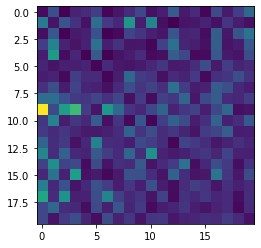

In [85]:
plt.imshow(plot_k_img_matr(0, 0,0))

In [115]:
data, sel = plot_k_img_matr(5, 0,0,k=20)

In [116]:
data[sel, :][:, sel].sum(axis=1)

array([0.34768134, 0.32180604, 0.3020646 , 0.3043126 , 0.30132428,
       0.3366196 , 0.2829958 , 0.2986027 , 0.3123199 , 0.30727848,
       0.2539903 , 0.35619277, 0.31259263, 0.3358759 , 0.31053492,
       0.26739743, 0.26515695, 0.3445147 , 0.31907687, 0.35657898],
      dtype=float32)

### Visual Bert Direct 

In [117]:
attn_d = np.load('%s/test_attn-visual_bert_direct_ft.npy' % attn_dir)
attn_d.shape

(64, 12, 12, 228, 228)

In [ ]:
layers = 